     M1    M2    M3    M4    M5    M6    M7    M8    M9   M10  ...   M135  \
0  1863  1614  2570  1685  2101  1811  2457  2171  2134  2502  ...  14917   

    M136   M137   M138   M139   M140   M141   M142   M143   M144  
0  15046  15556  15893  16388  16782  16716  17033  16896  17689  

[1 rows x 144 columns]


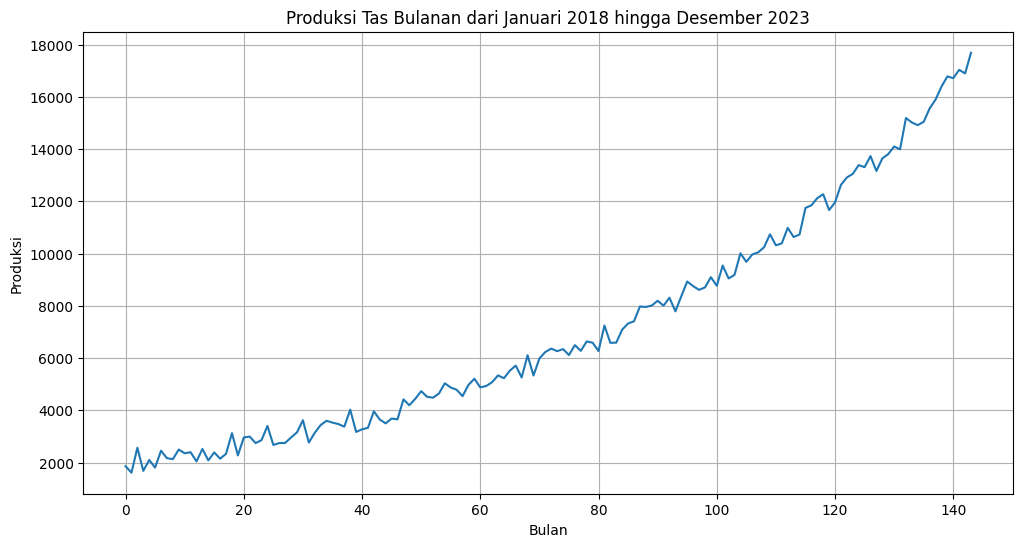

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Muat data
file_path = 'aol_data.csv'
data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama dari data
print(data.head())

# Plot data produksi
plt.figure(figsize=(12, 6))
months = [i for i in range(data.size)]
plt.plot(months, data.values[0])
plt.title('Produksi Tas Bulanan dari Januari 2018 hingga Desember 2023')
plt.xlabel('Bulan')
plt.ylabel('Produksi')
plt.grid(True)
plt.show()


In [13]:
data.size

144